<a href="https://colab.research.google.com/github/cyantran1711/personalportfolio/blob/main/Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This program attempts to optimize a users portfolio using the Efficient Frontier

In [ ]:
#import the python libraries
from pandas_datareader import data as web #dùng để lấy dữ liệu chứng khoán từ nguồn tài chính
import pandas as pd # xử lí dữ liệu dạng bảng data frame
import numpy as np # tính toán nhanh với số, ma trận, thống kế, xác suất
from datetime import datetime #làm việc với dữ liệu thời gian (chuyển đổi ngày tháng thành định dạng datetime --> hữu ích khi ptich biểu đồ giá theo tgian)
import matplotlib.pyplot as plt #vẽ biểu đồ trực quan hóa dữ liệu
plt.style.use('fivethirtyeight') #thay đổi style của biểu đồ để đẹp hơn (five thirty eight là một giao diện đồ thị chuyên nghiệp)

In [ ]:
#Get the stock symbols/ tickers in the portfolio
#FAANG
assets = ['META', 'AMZN', 'AAPL', 'TSLA', 'GOOG'] #list có thể thêm xóa hoặc thay đổi phần tử

In [ ]:
#assign weights to the stocks
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) #array chỉ lưu trữ số dạng int hoặc float

In [ ]:
# get the stocks/portfolio starting date
stockStartDate = '2019-02-13'

In [ ]:
#get the stocks ending date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2025-05-17'

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
#create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

#store the adjusted closed price of the stocks into the df (dùng hàm loop)
#lấy cột Adj close: giá đóng cửa đã điều chỉnh sau chia cổ tức, tách cổ phiếu
for stock in assets:
  try:
    data = yf.download(stock, start = stockStartDate, end = today)
    if 'Close' in data.columns:
      df[stock] = data['Close']
    else:
      print(f"Lỗi: Không tìm thấy 'Adj Close' trong dữ liệu của {stock}")
  except Exception as e:
    print(f"Lỗi khi tải dữ liệu {stock}: {e}")

print(df.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                  META       AMZN       AAPL       TSLA       GOOG
Date                                                              
2019-02-13  163.300369  82.000000  40.712143  20.544666  55.743969
2019-02-14  163.180923  81.132500  40.860474  20.251333  55.819115
2019-02-15  161.737732  80.397499  40.769562  20.525333  55.420002
2019-02-19  161.528717  81.378998  40.891571  20.375999  55.664349
2019-02-20  161.797424  81.105003  41.154728  20.170668  55.427471


In [ ]:
#df

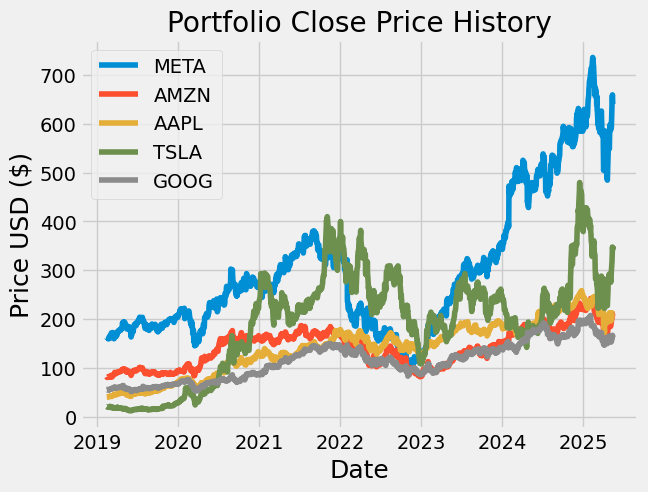

In [ ]:
#visually show the stock portfolio
title = 'Portfolio Close Price History'

#Get the stocks
my_stocks = df

#create plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price USD ($)', fontsize  = 18)
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()

In [ ]:
#show the daily simple return
returns = df.pct_change()
returns

,META,AMZN,AAPL,TSLA,GOOG
Date,,,,,
2019-02-13,NaN,NaN,NaN,NaN,NaN
2019-02-14,-0.000731,-0.010579,0.003643,-0.014278,0.001348
2019-02-15,-0.008844,-0.009059,-0.002225,0.013530,-0.007150
2019-02-19,-0.001292,0.012208,0.002993,-0.007276,0.004409
2019-02-20,0.001664,-0.003367,0.006435,-0.010077,-0.004255
...,...,...,...,...,...
2025-05-12,0.079225,0.080700,0.063146,0.067458,0.033683
2025-05-13,0.025961,0.013085,0.010152,0.049281,0.008209
2025-05-14,0.005076,-0.005299,-0.002818,0.040740,0.036795


In [ ]:
#create and show the annualized covariance matrix
cov_matrix_annual = returns.cov()*252 #number of trading date of year
cov_matrix_annual

,META,AMZN,AAPL,TSLA,GOOG
META,0.183337,0.093271,0.076234,0.100345,0.086255
AMZN,0.093271,0.119481,0.065943,0.101933,0.071179
AAPL,0.076234,0.065943,0.100069,0.101466,0.063408
TSLA,0.100345,0.101933,0.101466,0.431796,0.086175
GOOG,0.086255,0.071179,0.063408,0.086175,0.100199


In [ ]:
#calculate the variance of portfolio
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual,weights))
port_variance

np.float64(0.10509200373241949)

In [ ]:
#calculate the portfolio's volitility
port_volitility = np.sqrt(port_variance)
port_volitility

np.float64(0.3241789686769015)

In [ ]:
#calculate simple portfolio return
port_simple_annualReturns = np.sum(returns.mean()*weights)*252
port_simple_annualReturns

np.float64(0.3455904260281111)

In [ ]:
# show the volitility, variance and expected return
percent_var = str(round(port_variance,2)*100)+'%'
percent_volitility = str(round(port_volitility,2)*100)+'%'
percent_ER = str(round(port_simple_annualReturns,2)*100)+'%'
print(f"Portfolio's expected annual return: {percent_ER}")
print(f"Portfolio's annual variance: {percent_var}")
print(f"Portfolio's annual volitility: {percent_volitility}")

Portfolio's expected annual return: 35.0%
Portfolio's annual variance: 11.0%
Portfolio's annual volitility: 32.0%


In [ ]:
pip install PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 7.8 MB/s eta 0:00:00


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
#Portfolio optimzation
#Calculate the expected returns and the annualized sample covariance matrix of the asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#opt for max SR (return for sum of volitility)
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('META', 0.0), ('AMZN', 0.0), ('AAPL', 0.72795), ('TSLA', 0.27205), ('GOOG', 0.0)])
Expected annual return: 37.6%
Annual volatility: 35.4%
Sharpe Ratio: 1.06


(np.float64(0.3761431721719802),
 np.float64(0.35379816171072154),
 np.float64(1.0631575086575173))

In [ ]:
#Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=15000)

allocation, leftover = da.lp_portfolio()
print('Discretion allocation: ', allocation)
print('Fund remaining: ${:2f}'.format(leftover))

Discretion allocation:  {'AAPL': 51, 'TSLA': 12}
Fund remaining: $25.980142
